In [11]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import BeitForImageClassification, BeitForMaskedImageModeling

In [18]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [19]:
path = ["beit.encoder.layer[", "].attention.attention.query.weight", "].attention.attention.key.weight"]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
## pretrain on ImageNet-21k without fine-tuning 
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224-pt22k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-224-pt22k'] = [l, d, h, dh, sym_scores]

'BEiT large (l = 24, d = 1024, h = 16, patch = 16 ; 307M parameters)'
## pretrain on ImageNet-21k without fine-tuning 
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForMaskedImageModeling.from_pretrained('microsoft/beit-large-patch16-224-pt22k')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-224-pt22k'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
## pretrain on ImageNet-21k and fine-tuned on ImageNet 2012
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-224'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 307M parameters)'
## pretrain on ImageNet-21k and fine-tuned on ImageNet 2012
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-large-patch16-224')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-224'] = [l, d, h, dh, sym_scores]

'BEiT base (l = 12, d = 768, h = 12, patch = 16 ; 860M parameters)'
## pretrain on ImageNet-21k and fine-tuned on ImageNet 2012
dh = 64
patch = 16
l = 12
d = 768
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTbase-16-384'] = [l, d, h, dh, sym_scores]

'BEiT large (l = 24, d = 1024, h = 16, patch = 16 ; 307M parameters)'
## pretrain on ImageNet-21k and fine-tuned on ImageNet 2012
dh = 64
patch = 16
l = 24
d = 1024
h = d // dh
model = BeitForImageClassification.from_pretrained('microsoft/beit-large-patch16-384')
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['BEiTlarge-16-384'] = [l, d, h, dh, sym_scores]

Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k and are newly initialized: ['beit.pooler.layernorm.bias', 'beit.pooler.layernorm.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

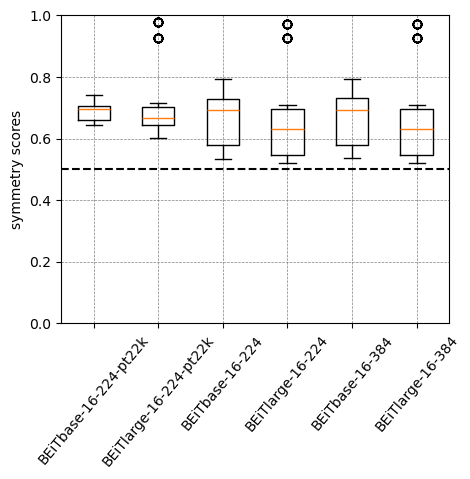

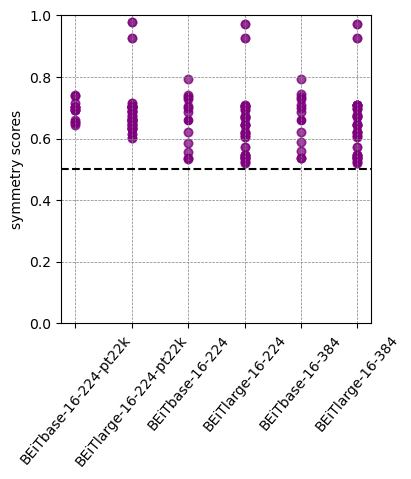

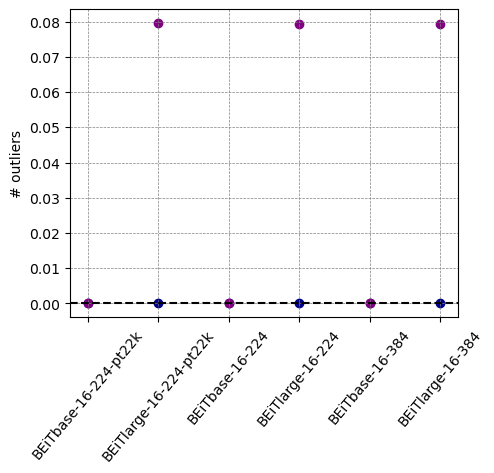

In [21]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)